In [121]:
from bs4 import BeautifulSoup
from graphviz import Graph
import requests
import re
import random


In [118]:
def get_subgraph(tag, max_tags):
    url = "https://www.thesaurus.com/browse/{}".format(tag)
    r  = requests.get(url)
    data = r.text
    soup = BeautifulSoup(data)

    tags = [a.get("href") for a in soup.find_all("a")]
    tags = [ x.replace('/browse/', '').split('/')[0] for x in tags if x is not None and x.startswith("/browse") and '%' not in x]
    tags = random.sample(tags, max_tags)
    return sorted(tags)

In [122]:
def add_nodes(word, dot, max_tags, levels):
    if levels == 0:
        return dot
    tags = get_subgraph(word, max_tags)
    for t in tags:
        dot.edge(word, t)
    return add_nodes(t, dot, max_tags, levels - 1)

def get_thesaurus_map(word, max_tags, levels):
    dot = Graph(comment='thesaurus', engine='sfdp')
    dot.attr("node", fontsize='9')
    dot.attr("node", color='None')
    add_nodes(word, dot, max_tags, levels)
    return dot

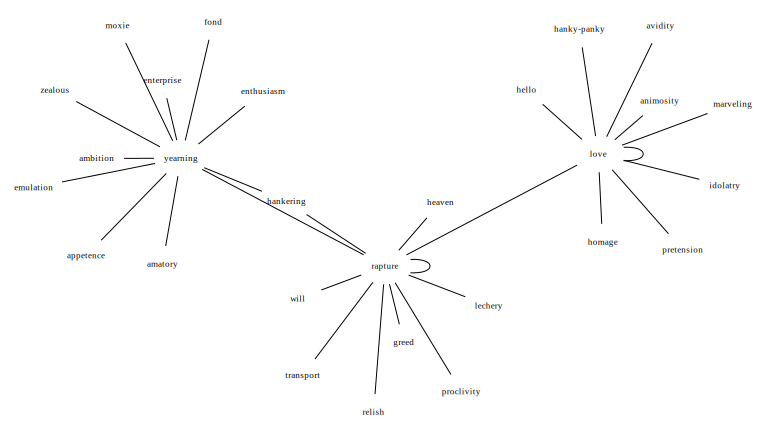

In [123]:
get_thesaurus_map("love", 10, 3)

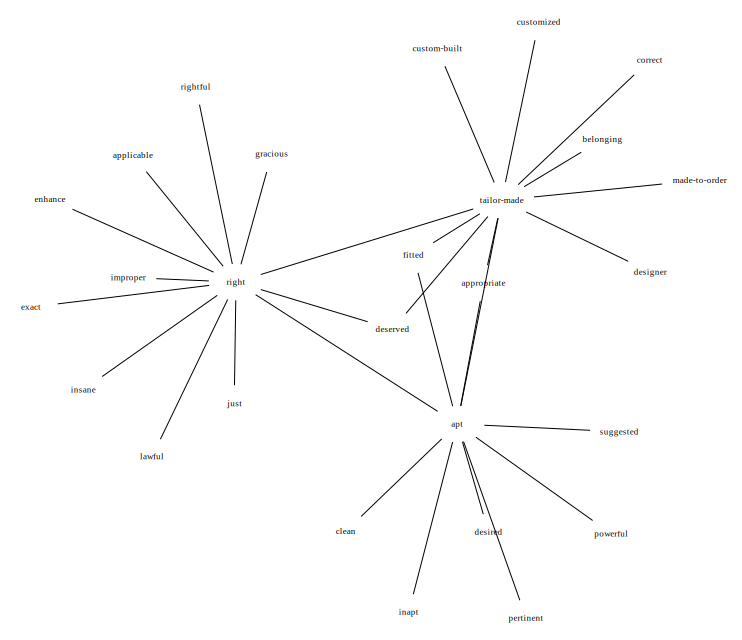

In [126]:
get_thesaurus_map("apt", 10, 3)

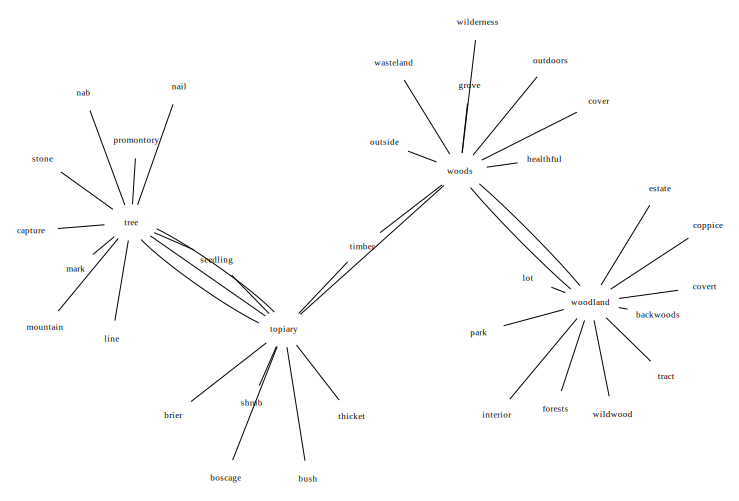

In [128]:
get_thesaurus_map("tree", 10, 4)